In [ ]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings ("ignore")
import matplotlib.pyplot as plt
import researchpy
import seaborn as sns
import sweetviz as sv
from scipy.stats import  iqr
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
!pip install sweetviz 

In [ ]:
!pip install researchpy


In [ ]:
data = pd.read_csv("/content/bank-additional-full.csv",sep=';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
data.duplicated().sum()

12

In [ ]:
data = data.drop_duplicates()
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
data.shape

(41176, 21)

In [ ]:
data.isna().sum().max()

0

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

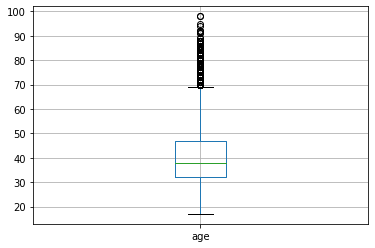

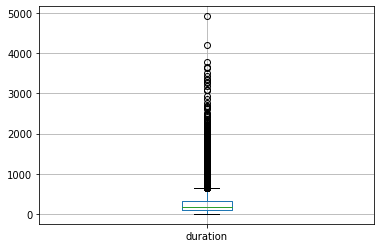

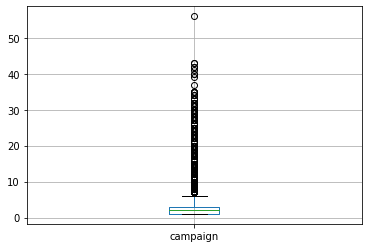

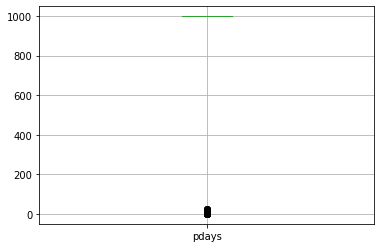

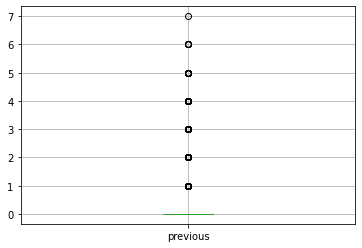

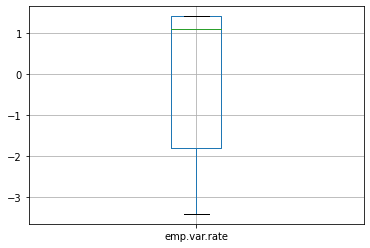

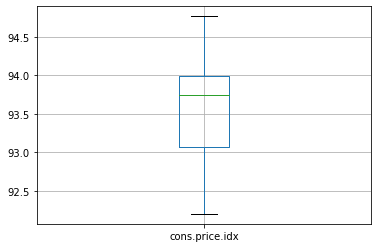

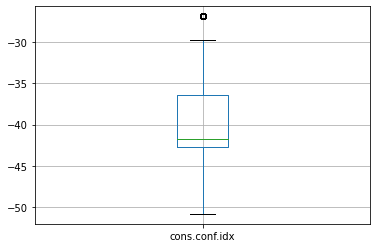

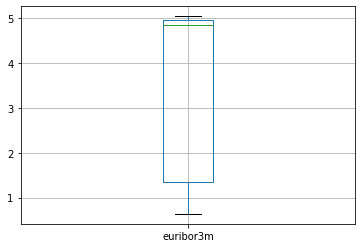

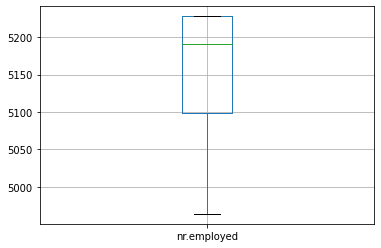

In [ ]:
for columns  in (data.dtypes[data.dtypes != "object"].index):
  plt.figure()
  data.boxplot([columns])

In [ ]:
data['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

In [ ]:
data['y'] = data['y'].map({'yes':1,'no':0})
data['y']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41176, dtype: int64

In [ ]:
data.corr()['pdays']['y']

-0.324947586385566

In [ ]:
data['pdays']= pd.cut(data['pdays'],bins=[-0.9,5,31,999],labels=['0 to 5 days','6 to 31 days','no previous contact'])

In [ ]:
crosstab,res = researchpy.crosstab(data['y'],data['pdays'],test='chi-square')
res.iloc[[2]]

,Chi-square test,results
2,Cramer's V =,0.3249


In [ ]:
data.corr()['previous'] ['y']

0.2302015702154456

In [ ]:
data['previous'].value_counts()

0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [ ]:
data['previous'] = pd.cut(data['previous'],bins=[-0.9,0,1,3,7],labels=['no contacted','1 day','2 or 3 days','4 to 7days'])
data['previous'].value_counts()

no contacted    35551
1 day            4561
2 or 3 days       970
4 to 7days         94
Name: previous, dtype: int64

Text(0.5, 1.0, 'Class Distribution')

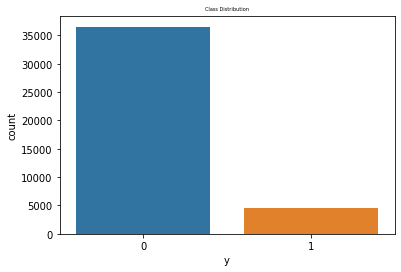

In [ ]:
sns.countplot("y", data=data)
plt.title("Class Distribution",fontsize = 5)

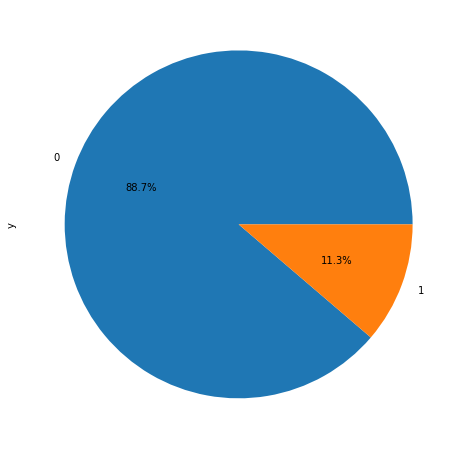

In [ ]:
data.y.value_counts().plot(kind="pie", autopct='%.1f%%', figsize=(8,8))

In [ ]:
report = sv.analyze(data)
report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
crosstab,res = researchpy.crosstab(data['y'],data['previous'],test='chi-square')
res.iloc[[2]]

,Chi-square test,results
2,Cramer's V =,0.2345


In [ ]:
list_box = ['age','campaign','cons.conf.idx','duration']
for columns in list_box:
  UT = data[columns].quantile(.75)+iqr(data[columns])*1.5
  LT = data[columns].quantile(.25)-iqr(data[columns])*1.5
  data[columns]=data[columns].clip(lower = LT,upper = UT) 

In [ ]:
unknown_perc = data.isin(['unknown']).sum()*(100/len(data))
unknown_perc

age                0.000000
job                0.801438
marital            0.194288
education          4.201477
default           20.876239
housing            2.404313
loan               2.404313
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

In [ ]:
data['default'].value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

In [ ]:
crosstab,res = researchpy.crosstab(data['y'],data['default'],test='chi-square')
res.iloc[[2]]

,Chi-square test,results
2,Cramer's V =,0.0994


In [ ]:
data_copy = data.copy()
data_copy['default'][data_copy['default']=='unknown']=data_copy['default'].mode()[0]

In [ ]:
crosstab,res = researchpy.crosstab(data_copy['y'],data_copy['default'],test='chi-square')
res.iloc[[2]]

,Chi-square test,results
2,Cramer's phi =,0.003


In [ ]:
list_n = unknown_perc[unknown_perc>0][unknown_perc<20].index
for columns in list_n:
  data[columns][data[columns]=='unknown']=data[columns].mode()[0]

In [ ]:
cross_tab = (pd.crosstab(index = data['y'],columns=data['job'],margins=True))
cross_tab

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,All
y,,,,,,,,,,,,
0,9361,8615,1332,954,2596,1284,1272,3644,600,6009,870,36537
1,1388,638,124,106,328,434,149,323,275,730,144,4639
All,10749,9253,1456,1060,2924,1718,1421,3967,875,6739,1014,41176


In [ ]:
cross_tab = (pd.crosstab(index = data['y'],columns=data['job'],margins=True,normalize='index')*100)
cross_tab

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
y,,,,,,,,,,,
0,25.620604,23.578838,3.64562,2.611052,7.105126,3.514246,3.481402,9.973452,1.642171,16.446342,2.381148
1,29.920241,13.752964,2.67299,2.284975,7.070489,9.355465,3.211899,6.962707,5.928002,15.736150,3.104117
All,26.105013,22.471828,3.53604,2.574315,7.101224,4.172333,3.451039,9.634253,2.125024,16.366330,2.462600


In [ ]:
cross_tab1 = (pd.crosstab(index = data['job'],columns=data['y'],normalize='index')*100)
cross_tab1
x = cross_tab1.index
fig = go.Figure(go.Bar(x=x,y=cross_tab1[0].values,name='no'))
fig.add_trace(go.Bar(x=x,y=cross_tab1[1].values,name='yes'))
fig.update_layout(barmode= "stack")
fig.show()

In [ ]:
fig = go.Figure(data=[go.Pie(labels =['no','yes'],values=data['y'].value_counts().values)])
fig.update_layout(annotations = [dict (text ='y',x=0.5,y=0.5,font_size=20,showarrow=False)])
fig.show()


In [ ]:
cross_tab = (pd.crosstab(index = data['y'],columns=data['marital'],margins=True,normalize='index')*100)
cross_tab

marital,divorced,married,single
y,,,
0,11.317295,61.466459,27.216247
1,10.260832,54.817849,34.921319
All,11.198271,60.717408,28.084321


In [ ]:

from plotly.subplots import make_subplots 
fig=make_subplots (rows=2, cols=2)

cs_marital=pd.crosstab(index=data['marital'],columns=data['y'], normalize="index")*100
fig.add_trace(go. Bar(x=cs_marital.index, y=cs_marital[1].values, name='yes',marker_color='gold'))
fig.add_trace(go.Bar(x=cs_marital.index,y=cs_marital[0].values,name='no', marker_color='coral'))
fig.update_xaxes (title_text="marital status", row=1, col=1)
# CS_poutcome=pd.crosstab(index=data['poutcome'],columns=data['y'l, normalize='index' )*100 fig.add_trace(go. Bar(x=cs_poutcome. index, y-cs_poutcome[1].values, showlegend=False, marker_color: fig.add_trace(go. Bar(x=cs_poutcome.index,y=cs_poutcome[0].values, showlegend=False, marker color:

In [ ]:
cs_poutcome= pd.crosstab(index=data['poutcome'],columns=data['y'], normalize='index' )*100
fig.add_trace(go. Bar(x=cs_poutcome. index, y=cs_poutcome[1].values, showlegend=False, marker_color='gold'))
fig.add_trace(go. Bar(x=cs_poutcome.index,y=cs_poutcome[0].values, showlegend=False, marker_color='gold'))
fig.update_xaxes (title_text="previous campaign outcome", row=1, col=2)


In [ ]:
cs_month=pd.crosstab(index=data['month'],columns=data['y' ], normalize='index')*100
fig.add_trace(go. Bar(x=cs_month. index, y=cs_month[1].values, name='yes',showlegend=False, marker_color='gold'))
fig.add_trace(go. Bar(x=cs_month. index, y=cs_month[0].values, name ='no',showlegend=False, marker_color='gold'))
fig.update_xaxes(title_text="last contact month", row=2, col=1)


In [ ]:
cs_week_day=pd.crosstab(index=data['day_of_week'],columns=data['y'], normalize='index')*100 
fig.add_trace(go. Bar(x=cs_week_day.index, y=cs_week_day[1].values, showlegend=False, marker_color='red'))
fig.add_trace(go.Bar(x=cs_week_day.index, y=cs_week_day[0].values, showlegend=False, marker_color='red'))
fig.update_xaxes (title_text="last contact day", row=2, col=2)
fig. update_layout (barmode='stack', height=900, width=700)
fig.show()